In [13]:
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.api import VAR
from scipy.stats import shapiro
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import re
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
# O presente conjunto de dados pode ser encontrado no kaggle:https://www.kaggle.com/c/data-science-challenge-at-ita-2021-warm-up/data

df = pd.read_csv("warmupv4publictrain.csv")

In [15]:
df.head(2)

,p,f,a1,a2,a3,a4,b1,b2,b3,b4,...,l1,l2,l3,l4,e1,e2,size,altitute,agents,sd_trans
0,0.6,0.4,2.4,0.19,3.3,0.19,2.1,0.23,2.0,0.26,...,0.194,1.0,0.065,1.2,2.2,0.2,1856.0,average,950.0,43.0
1,0.7,0.4,2.9,0.12,1.1,0.28,1.5,0.14,4.6,0.18,...,0.108,1.2,0.048,0.9,0.2,1.9,880.0,average,950.0,43.1


Como é possviel notar a feature 'altitude' é categorica, o que demanda uma conversao em numerica para que o modelo possa ser trabalhado.

In [16]:
#valor categorico para numerico
df['altitute'].replace(to_replace=dict(average = 0, low = 1, high = 2), inplace=True)

In [17]:
df.describe()

,p,f,a1,a2,a3,a4,b1,b2,b3,b4,...,l1,l2,l3,l4,e1,e2,size,altitute,agents,sd_trans
count,686.000000,689.000000,689.000000,687.000000,694.000000,682.000000,681.000000,691.000000,696.000000,693.000000,...,686.000000,685.000000,697.000000,686.000000,688.000000,689.000000,697.000000,689.000000,693.000000,704.000000
mean,0.702770,0.347170,3.022351,0.201820,2.934150,0.201716,2.928634,0.201331,3.043822,0.201255,...,0.103284,1.229051,0.051636,1.255831,1.572529,1.577504,2150.011478,0.904209,498.268398,30.809091
std,0.121576,0.095212,1.126863,0.055531,1.182326,0.056834,1.129792,0.057870,1.161761,0.058193,...,0.058395,0.432272,0.028267,0.434719,0.859090,0.842806,1559.577619,0.824478,253.894299,9.620975
min,0.500000,0.200000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,...,0.000000,0.500000,0.000000,0.500000,0.100000,0.100000,110.000000,0.000000,50.000000,2.200000
25%,0.600000,0.300000,2.100000,0.160000,1.900000,0.150000,2.000000,0.150000,2.000000,0.150000,...,0.049250,0.800000,0.029000,0.900000,0.800000,0.900000,1014.000000,0.000000,300.000000,25.900000
50%,0.700000,0.300000,3.000000,0.210000,2.900000,0.200000,2.900000,0.200000,3.100000,0.200000,...,0.104500,1.200000,0.051000,1.300000,1.500000,1.600000,1734.000000,1.000000,500.000000,32.650000
75%,0.800000,0.400000,4.000000,0.250000,4.000000,0.250000,3.800000,0.250000,4.100000,0.250000,...,0.156750,1.600000,0.075000,1.600000,2.300000,2.300000,2964.000000,2.000000,750.000000,38.200000
max,0.900000,0.500000,5.000000,0.300000,5.000000,0.300000,5.000000,0.300000,5.000000,0.300000,...,0.200000,2.000000,0.100000,2.000000,3.000000,3.000000,8400.000000,2.000000,950.000000,46.200000


In [18]:
#Verificando dados faltantes
df.isnull().sum()

p           18
f           15
a1          15
a2          17
a3          10
a4          22
b1          23
b2          13
b3           8
b4          11
c1          13
c2          19
c3          17
c4          11
g1          14
g2          10
l1          18
l2          19
l3           7
l4          18
e1          16
e2          15
size         7
altitute    15
agents      11
sd_trans     0
dtype: int64

In [30]:
col = df.columns
for i in col:
    df[f'{i}'].fillna(df[f'{i}'].mean(), inplace=True)

In [31]:
df.isnull().sum()

p           0
f           0
a1          0
a2          0
a3          0
a4          0
b1          0
b2          0
b3          0
b4          0
c1          0
c2          0
c3          0
c4          0
g1          0
g2          0
l1          0
l2          0
l3          0
l4          0
e1          0
e2          0
size        0
altitute    0
agents      0
sd_trans    0
dtype: int64

In [36]:
#realção com a amedia. Valores muito acima ou abixo de 0 apresentão distanciamento da media
df.skew()

p          -0.053764
f           0.010407
a1         -0.022434
a2         -0.071316
a3          0.082324
a4          0.008171
b1          0.072676
b2         -0.023355
b3         -0.036007
b4          0.023673
c1         -0.068718
c2          0.017155
c3         -0.046393
c4         -0.003930
g1         -0.020363
g2         -0.077021
l1         -0.028742
l2          0.054192
l3         -0.077229
l4         -0.024888
e1          0.065623
e2         -0.071260
size        1.279164
altitute    0.181411
agents     -0.006628
sd_trans   -0.906620
dtype: float64

p           AxesSubplot(0.125,0.125;0.025x0.755)
f           AxesSubplot(0.155,0.125;0.025x0.755)
a1          AxesSubplot(0.185,0.125;0.025x0.755)
a2          AxesSubplot(0.215,0.125;0.025x0.755)
a3          AxesSubplot(0.245,0.125;0.025x0.755)
a4          AxesSubplot(0.275,0.125;0.025x0.755)
b1          AxesSubplot(0.305,0.125;0.025x0.755)
b2          AxesSubplot(0.335,0.125;0.025x0.755)
b3          AxesSubplot(0.365,0.125;0.025x0.755)
b4          AxesSubplot(0.395,0.125;0.025x0.755)
c1          AxesSubplot(0.425,0.125;0.025x0.755)
c2          AxesSubplot(0.455,0.125;0.025x0.755)
c3          AxesSubplot(0.485,0.125;0.025x0.755)
c4          AxesSubplot(0.515,0.125;0.025x0.755)
g1          AxesSubplot(0.545,0.125;0.025x0.755)
g2          AxesSubplot(0.575,0.125;0.025x0.755)
l1          AxesSubplot(0.605,0.125;0.025x0.755)
l2          AxesSubplot(0.635,0.125;0.025x0.755)
l3          AxesSubplot(0.665,0.125;0.025x0.755)
l4          AxesSubplot(0.695,0.125;0.025x0.755)
e1          AxesSubp

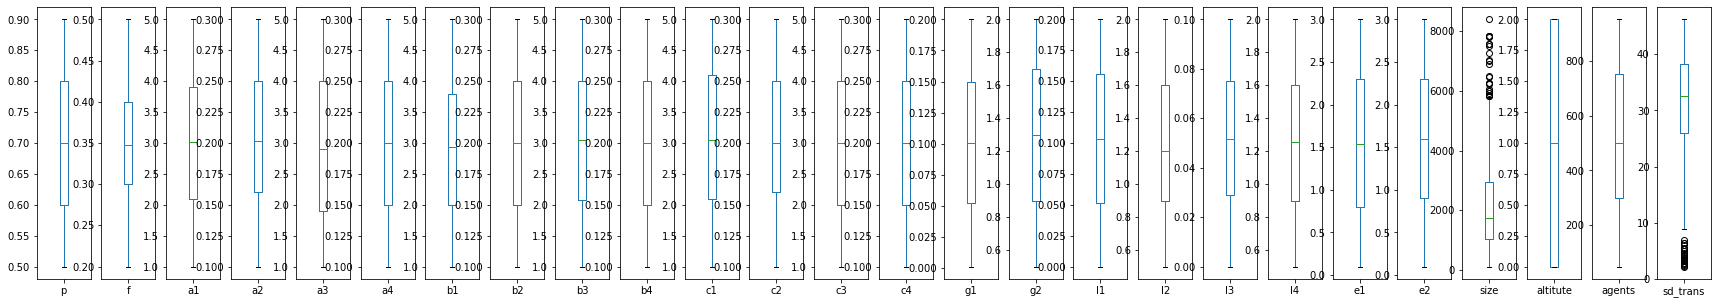

In [37]:
df.plot(kind = 'box', subplots =True, figsize = (30,5))

Pelo boxplot acima nota-se que os outliers encontram-se nas features: size e sd_trans

Em seguida sera usado o teste de Causalidade de Granger para confirmar a relação entre as features

In [40]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr-chi2test'

def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
    if verbose: 
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
        min_p_value = np.min(p_values)
        dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset


grangers_causality_matrix(df, variables = df.columns)

,p_x,f_x,a1_x,a2_x,a3_x,a4_x,b1_x,b2_x,b3_x,b4_x,...,l1_x,l2_x,l3_x,l4_x,e1_x,e2_x,size_x,altitute_x,agents_x,sd_trans_x
p_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a1_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a2_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a3_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a4_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b2_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b3_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


De acordo com o teste as features sao perfeitamentes cointegradas podendo serem usadas todas para o modelo

## REGRESSAO MUTIPLA

Dividir o df em treino e teste

In [44]:
vr = df.sd_trans # Variavel resposta
vp = df.drop(columns = 'sd_trans') # conjunto de variaveis preditoras

In [51]:
#teste de relação pelo OLS
res = sm.OLS(vr,vp).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               sd_trans   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              715.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:21:15   Log-Likelihood:                         -2280.5
No. Observations:                 704   AIC:                                      4611.
Df Residuals:                     679   BIC:                                      4725.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Segundo o sumario anterio de relação entre as features ha uma relação das variaveis independentes serem causa da dependentede em 96%

In [52]:
x_train, x_test,y_train, y_test = train_test_split(vp,vr)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(528, 25) (528,) (176, 25) (176,)


In [53]:
#treino do modelo
model = LinearRegression().fit(x_train, y_train)

In [54]:
#resultado sobre o modelo
print('coefficient of determination:', model.score(x_train, y_train))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.582998038627345
intercept: 21.17428910077488
slope: [-1.29008800e+01 -2.64652607e+00  1.59289169e+00  1.37542556e+00
 -1.46007473e+00  2.43675353e+00 -2.16065935e-02  7.24142686e+00
  6.23633177e-01  6.04904971e+00 -8.91950195e-01 -1.05787259e-01
  2.02837921e+00  8.75184223e-01  6.31133293e+01  3.61386994e+00
  2.12261508e+00 -1.74373459e-01  2.62315157e+01  1.41739636e+00
 -2.12826048e+00 -1.02967156e+00 -1.67796445e-03 -9.26488114e-01
  1.09569675e-02]


In [56]:
previsao = model.predict(x_test)

In [75]:
previsao1 = pd.DataFrame(previsao)

In [77]:
previsao1.to_csv('previsaoITA.csv')

In [79]:
teste = pd.DataFrame(y_test)

In [82]:
teste

,sd_trans
541,28.9
68,39.2
112,32.6
493,38.9
619,11.9
...,...
311,27.6
321,24.7
421,36.5
263,15.7


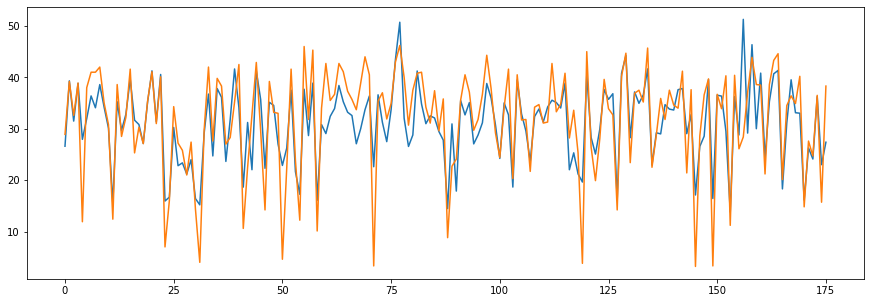

In [91]:
#Plotar grafico comparativo do modelo treinado com os dados de teste com os dados de teste
plt.figure(figsize=(15,5))
plt.plot(previsao1.values)
plt.plot(teste.values)
plt.show()

É possivel notar como o modelo adapta-se aos valores resultados perfetamente, podendo ate sofrer de overfitting

TESTANDO O MODELO

In [120]:
#   ESCORE DO MODELO
score_treino = model.score(x_train, y_train)
score_teste =model.score(x_test,y_test)
print("Score de Traino",score_treino,"\nEscore sobre o Teste: ",score_teste)

Score de Traino 0.582998038627345 
Escore sobre o Teste:  0.67330043839154


In [126]:
# Teste RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(previsao1, teste))
rmse

5.757964772695722